<p align="center">
  <img src="https://user-images.githubusercontent.com/22350795/236680126-0b1cdd62-d6fc-4620-b998-75ed6c31bf6f.png" height=70>
</p>

# StableSR Inference Demo
## Exploiting Diffusion Prior for Real-World Image Super-Resolution
Jianyi Wang, Zongsheng Yue, Shangchen Zhou, Kelvin C.K. Chan, Chen Change Loy

# 1. Preparations
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)
* Runtime Shape = High-RAM (in the Runtime menu -> Change runtime type, You need Colab Pro).

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
!rm -rf StableSR

# Clone StableSR and enter the StableSR folder
!git clone https://github.com/IceClear/StableSR.git
%cd StableSR

Cloning into 'StableSR'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 297 (delta 88), reused 244 (delta 48), pack-reused 0
Receiving objects: 100% (297/297), 6.82 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/StableSR


In [ ]:
# Install Conda
# https://github.com/conda-incubator/condacolab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


It will restart your kernal so make sure to run %cd StableSR down below and also make sure you downloaded conda correctly by running the cell below.

In [ ]:
%cd StableSR
!conda --version

/content/StableSR
conda 23.1.0


In [ ]:
# Create a conda environment and activate it, may cost 10 more mins to run
!export CONDA_ALWAYS_YES="true"
!conda env create --file environment.yaml
!conda activate stablesr

# Install xformers
!conda install xformers -c xformers/label/dev

# Install taming & clip
!pip install -e git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
!pip install -e git+https://github.com/openai/CLIP.git@main#egg=clip
!pip install -e .

# Download the pre-trained model
!wget https://huggingface.co/Iceclear/StableSR/resolve/main/stablesr_000117.ckpt
!wget https://huggingface.co/Iceclear/StableSR/resolve/main/vqgan_cfw_00011.ckpt

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('StableSR', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



lcms2-2.12           | 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/StableSR
  Preparing metadata (setup.py) ... done
  Running setup.py develop for StableSR
--2023-05-18 03:01:01--  https://huggingface.co/Iceclear/StableSR/resolve/main/stablesr_000117.ckpt
Resolving huggingface.co (huggingface.co)... 13.227.219.125, 13.227.219.105, 13.227.219.41, ...
Connecting to huggingface.co (huggingface.co)|13.227.219.125|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/08/fb/08fbc3ebd1df5be43a42f89d1c07bfdab3df70de4b769ec731181614d032dcfc/b8862bf3fd11c5b8fe82fb8a4618a1c74a29e0301a190bd6c2e84d68986ef9cb?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27stablesr_000117.ckpt%3B+filename%3D%22stablesr_000117.ckpt%22%3B&Expires=1684638068&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzA4L2ZiLzA4ZmJjM2ViZDFkZjViZTQzYTQ

Some packages need to be refined on Colab. The reason is unknown but just reinstall them. If you have better solutions, feel free to open the issue on [Github repo](https://github.com/IceClear/StableSR).

In [ ]:
!pip install omegaconf
!pip install einops
!pip install opencv-python
!pip install scipy
!pip install scikit-image
!pip install matplotlib
!pip install scikit-learn
!pip install transformers
!pip install kornia
!pip install open_clip_torch==2.0.2
!pip install pip install -U xformers
!pip install torchmetrics==0.6.0
!pip install pytorch-lightning==1.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=bc1209381932a79c56aa160a1de5c891bf11697a89ba3dedefad56a9157db4a5
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.0 MB/s eta 0:00:00
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 119.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.2 MB/s eta 0:00:00
  Using cached python_dateutil-2.8.2-py2.py3-none-a

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 92.9 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.8 MB/s eta 0:00:00
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached fsspec-2023.5.0-py3-none-any.whl (160 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 20.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached open_clip_torch-2.0.2-py3-none-any.

&nbsp;
***
&nbsp;
# 2. Test on your images 🔥

If StableSR is helpful to your photos, please help star our [repo](https://github.com/IceClear/StableSR). Thanks! 🤗

[![GitHub Stars](https://img.shields.io/github/stars/IceClear/StableSR?style=social)](https://github.com/IceClear/StableSR)

In [ ]:
# Upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving building.png to building.png
move building.png to inputs/user_upload/building.png


You may manually change '--colorfix_type' to 'wavelet' for better color correction, or disable it by changing to 'nofix'. We use 'adain' by default as in the paper.



In [ ]:
# Inference the uploaded images
#@markdown `DDPM_STEPS`: Number of DDPM steps for sampling<br>
DDPM_STEPS = 200 #@param {type:"slider", min:10, max:1000, step:10}
#@markdown `FIDELITY_WEIGHT`: Balance the quality (lower number) and fidelity (higher number)<br>
FIDELITY_WEIGHT = 0.97 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `UPSCALE`: The upscale for super-resolution, 4x SR by default<br>
UPSCALE = 4.0 #@param {type:"slider", min:1.0, max:16.0, step:0.5}
#@markdown `SEED`: The random seed for sampling<br>
SEED = 42 #@param {type:"slider", min:0, max:10000, step:1}
#@markdown `TILE_OVERLAP`: The overlap between tiles, betwwen 0 to 64<br>
TILE_OVERLAP = 32 #@param {type:"slider", min:0, max:60, step:2}
#@markdown `VQGANTILE_SIZE`: The size for VQGAN tile operation in pixel, min 512.<br>
VQGANTILE_SIZE = 1280 #@param {type:"slider", min:512, max:2000, step:2}
#@markdown `Aggregation_Sampling`: Use Aggregation Sampling if the expected resolution is not 512x512<br>
Aggregation_Sampling = False #@param {type:"boolean"}
#@markdown `Enable_Tile`: Enable tile to handle large resolution beyond 1024x1024<br>
Enable_Tile = False #@param {type:"boolean"}

VQGANTILE_STRIDE = int(VQGANTILE_SIZE * 0.9)
if Enable_Tile:
  !python scripts/sr_val_ddpm_text_T_vqganfin_oldcanvas_tile.py --config configs/stableSRNew/v2-finetune_text_T_512.yaml --ckpt './stablesr_000117.ckpt' --vqgan_ckpt './vqgan_cfw_00011.ckpt' --init-img 'inputs/user_upload' --outdir 'outputs/user_upload' --ddpm_steps {DDPM_STEPS} --dec_w {FIDELITY_WEIGHT} --upscale {UPSCALE} --tile_overlap {TILE_OVERLAP} --seed {SEED} --vqgantile_stride {VQGANTILE_STRIDE} --vqgantile_size {VQGANTILE_SIZE} --colorfix_type 'adain'
elif Aggregation_Sampling:
  !python scripts/sr_val_ddpm_text_T_vqganfin_oldcanvas.py --config configs/stableSRNew/v2-finetune_text_T_512.yaml --ckpt './stablesr_000117.ckpt' --vqgan_ckpt './vqgan_cfw_00011.ckpt' --init-img 'inputs/user_upload' --outdir 'outputs/user_upload' --ddpm_steps {DDPM_STEPS} --dec_w {FIDELITY_WEIGHT} --upscale {UPSCALE} --tile_overlap {TILE_OVERLAP} --seed {SEED} --colorfix_type 'adain'
else:
  !python scripts/sr_val_ddpm_text_T_vqganfin_old.py --config configs/stableSRNew/v2-finetune_text_T_512.yaml --ckpt './stablesr_000117.ckpt' --vqgan_ckpt './vqgan_cfw_00011.ckpt' --init-img 'inputs/user_upload' --outdir 'outputs/user_upload' --ddpm_steps {DDPM_STEPS} --dec_w {FIDELITY_WEIGHT} --seed {SEED} --colorfix_type 'adain'

>>>>>>>>>>color correction>>>>>>>>>>>
True
Loading model from ./vqgan_cfw_00011.ckpt
Global Step: 18000
/usr/local/lib/python3.10/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 64, 64) = 16384 dimensions.
making attention of type 'vanilla' with 512 in_channels
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'wei

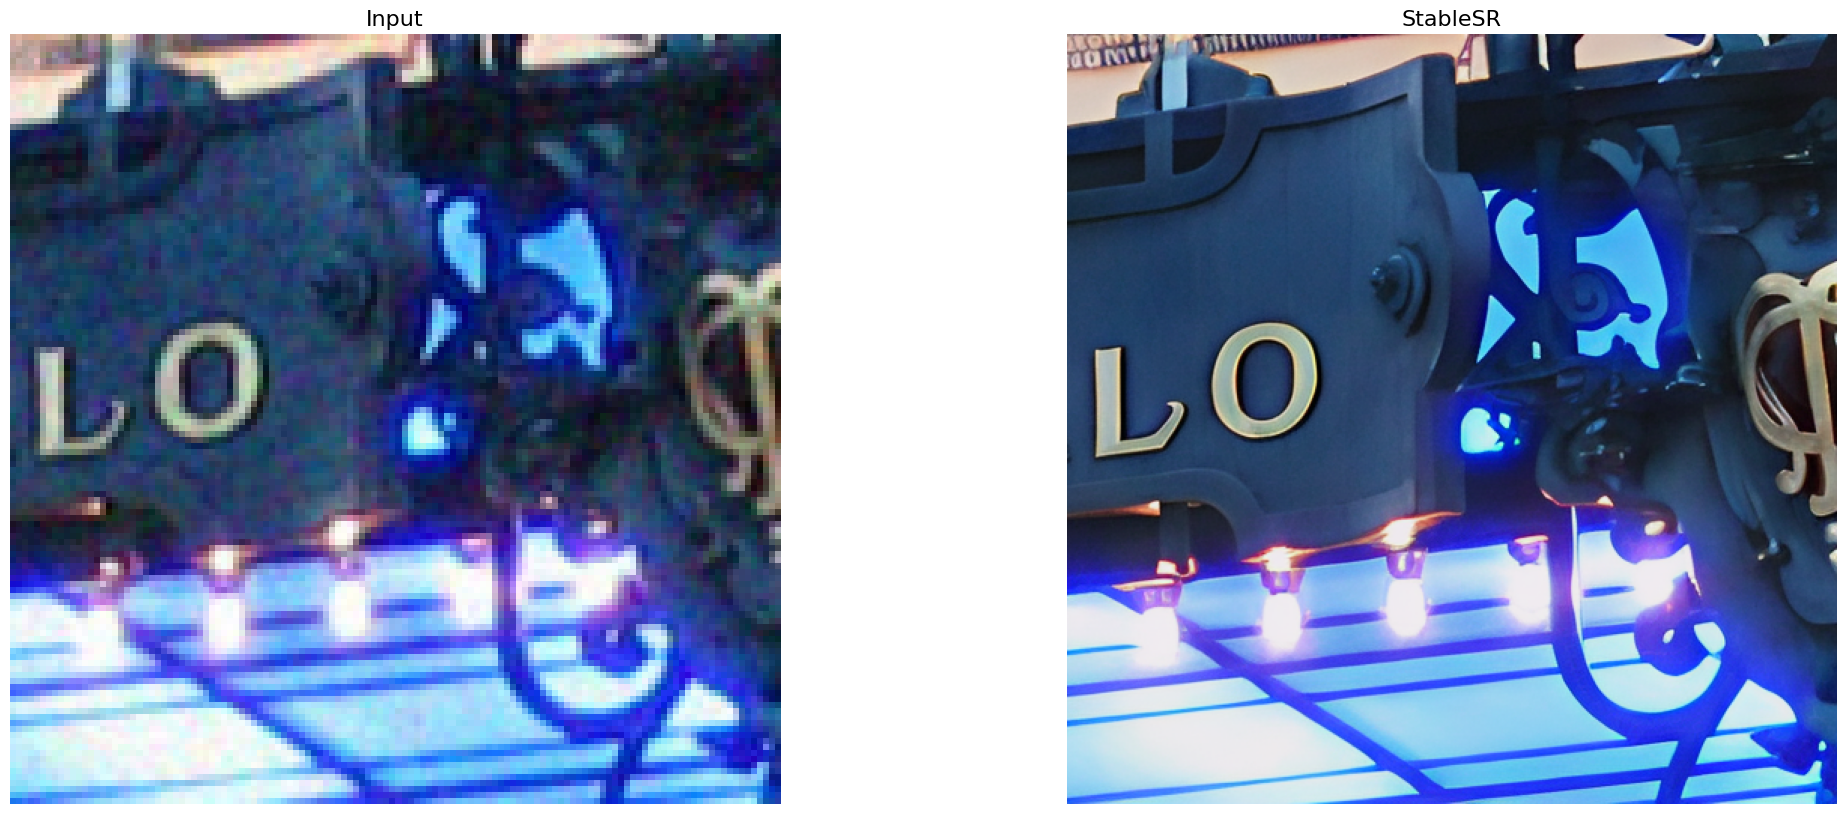

In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'outputs/user_upload'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
# Download results
!ls results
print('Download results')
os.system(f'zip -r results.zip outputs/user_upload')
files.download("results.zip")

ls: cannot access 'results': No such file or directory
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>